In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.DataFrame({'client_id': [np.NaN, 2998.0, np.NaN, np.NaN, 3530.0],
                   'sex': [np.NaN, 1., np.NaN, np.NaN, 0.],
                   'wealth': [np.NaN, 'high', np.NaN, np.NaN, 'high'],
                   'age': ['58', '55', '46', '23', '44']})

In [ ]:
df

,client_id,sex,wealth,age
0,NaN,NaN,NaN,58
1,2998.0,1.0,high,55
2,NaN,NaN,NaN,46
3,NaN,NaN,NaN,23
4,3530.0,0.0,high,44


In [ ]:
df.isna().sum()

client_id    3
sex          3
wealth       3
age          0
dtype: int64

In [ ]:
df_types = df.dtypes

In [ ]:
df_types

client_id    float64
sex          float64
wealth        object
age           object
dtype: object

In [ ]:
df['age'] = df['age'].astype(int)

In [ ]:
df.dtypes

client_id    float64
sex          float64
wealth        object
age            int64
dtype: object

In [ ]:
new_df = df

In [ ]:
new_df = new_df.drop(columns=['sex', 'age'])

In [ ]:
new_df

,client_id,wealth
0,NaN,NaN
1,2998.0,high
2,NaN,NaN
3,NaN,NaN
4,3530.0,high


In [ ]:
df = df.drop_duplicates(subset=['client_id'])

In [ ]:
df

,client_id,sex,wealth,age
0,NaN,NaN,NaN,58
1,2998.0,1.0,high,55
4,3530.0,0.0,high,44


In [ ]:
numbers = [1, -2, 3, 0, -3, 2]

In [ ]:
from itertools import takewhile

In [ ]:
new_numbers = list(takewhile(lambda num: num != 0, [num for num in numbers if num >= 0]))

In [ ]:
new_numbers

[1, 3]

# Работа с датасетом taxi_peru

In [ ]:
taxi = pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [ ]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [ ]:
taxi.head(5)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [ ]:
taxi = taxi.query('start_type == "asap" or start_type == "reserved"').copy()

In [ ]:
taxi['start_type'].value_counts()

asap        14865
reserved     8226
Name: start_type, dtype: int64

In [ ]:
taxi['wait_time'] = taxi['arrived_at'] - taxi['start_at']
taxi['wait_time'] = taxi['wait_time'].astype('timedelta64[m]')

In [ ]:
taxi.query('start_type == "reserved" and wait_time > 0.0') \
.groupby('driver_id', as_index=False).agg({'journey_id': 'count'}) \
.rename(columns={'journey_id': 'being_late_times'}) \
.sort_values('being_late_times', ascending=False)

,driver_id,being_late_times
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45
...,...,...
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
51,8cb98e46b27af1e6fca8768a2a6329f3,1
16,389bfa333ba8fa7281dd5f0e1b57c0c1,1


In [ ]:
taxi[taxi['driver_id'] == '406921adcca37705ef527b4246c0cfea'].groupby('journey_id').agg({'user_id': 'count'})

,user_id
journey_id,
0194b4a5c9e41bfd35f9168423fa4b1a,1
01aef738ea3c7316c256e6feade70393,1
0234eb5f7e99d581c72052f0a843e4fb,1
0234eb5f7e99d581c72052f0a86b160b,1
024c171753a0a345d596bd7f9ede8ec6,1
...,...
ff5c924e0b630fd7c019a4234056f471,1
ff5c924e0b630fd7c019a4234056fdc2,1
ff6a84ba8617c8f737332970b95e4cfd,1


In [ ]:
taxi['month'] = taxi['start_at'].dt.month

In [ ]:
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')

In [ ]:
taxi['weekday'].head(5)

0     Tuesday
1     Tuesday
2      Monday
3     Tuesday
4    Saturday
Name: weekday, dtype: object

<Axes: xlabel='month', ylabel='count'>

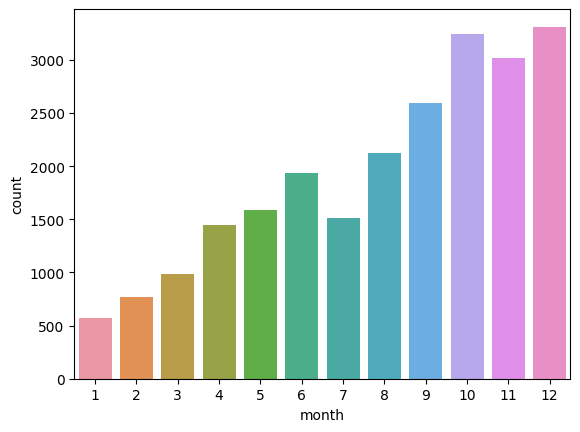

In [ ]:
sns.countplot(taxi, x=taxi['month'])

<Axes: xlabel='weekday', ylabel='count'>

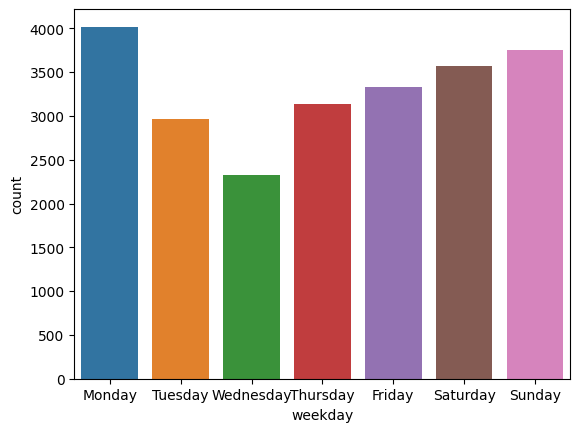

In [ ]:
sns.countplot(taxi, x=taxi['weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [ ]:
taxi.source.value_counts()

iPhone     9741
web        7631
Android    4889
iPad        571
Wap         136
Name: source, dtype: int64

<Axes: xlabel='month'>

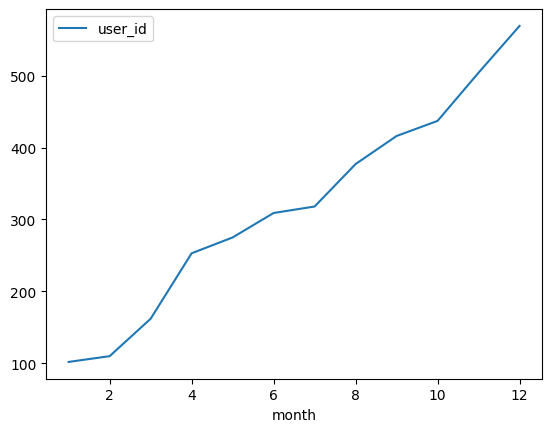

In [ ]:
taxi.groupby('month').agg({'user_id': 'nunique'}).plot()

# Минипроект

In [ ]:
!unzip -u '/content/drive/MyDrive/Karpov_Courses/data/4_data.zip'

In [ ]:
from pathlib import Path

In [ ]:
DATASET = Path('/content/data')

In [ ]:
path_list_general = [p.resolve() for p in DATASET.glob('**/*') if p.suffix == '.csv']

In [ ]:
path_list_general[0].parent.name

'Vasiliy_Ivanov'

In [ ]:
test_df = pd.read_csv(path_list_general[0], index_col='Unnamed: 0')
test_df['name'] = path_list_general[0].parent.name
test_df['date'] = path_list_general[0].parent.parent.name
test_df

,product_id,quantity,name,date
0,82,4,Vasiliy_Ivanov,2020-12-09
1,74,2,Vasiliy_Ivanov,2020-12-09
2,54,3,Vasiliy_Ivanov,2020-12-09


In [ ]:
datasets = {}
for ind, path in enumerate(path_list_general):
  datasets[f'df_{ind}'] = pd.read_csv(path, index_col='Unnamed: 0')
  datasets[f'df_{ind}']['name'] = path.parent.name
  datasets[f'df_{ind}']['date'] = path.parent.parent.name


In [ ]:
concat_dataset = pd.concat(datasets.values())

In [ ]:
concat_dataset = concat_dataset.reset_index(drop=True)

In [ ]:
concat_dataset.dtypes

product_id             int64
quantity               int64
name                  object
date          datetime64[ns]
dtype: object

In [ ]:
concat_dataset['date'] = pd.to_datetime(concat_dataset['date'], format='%Y-%m-%d')

In [ ]:
concat_dataset['quantity'].sum()

480

In [ ]:
concat_dataset.groupby('name', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)['name'].tolist()[:2]

['Alexey_Smirnov', 'Petr_Smirnov']

In [ ]:
top_products = concat_dataset.groupby('product_id', as_index=False).agg({'quantity': 'sum'})

In [ ]:
top_products.head()

,product_id,quantity
0,0,4
1,1,4
2,3,8
3,4,6
4,6,10


<Axes: xlabel='product_id', ylabel='quantity'>

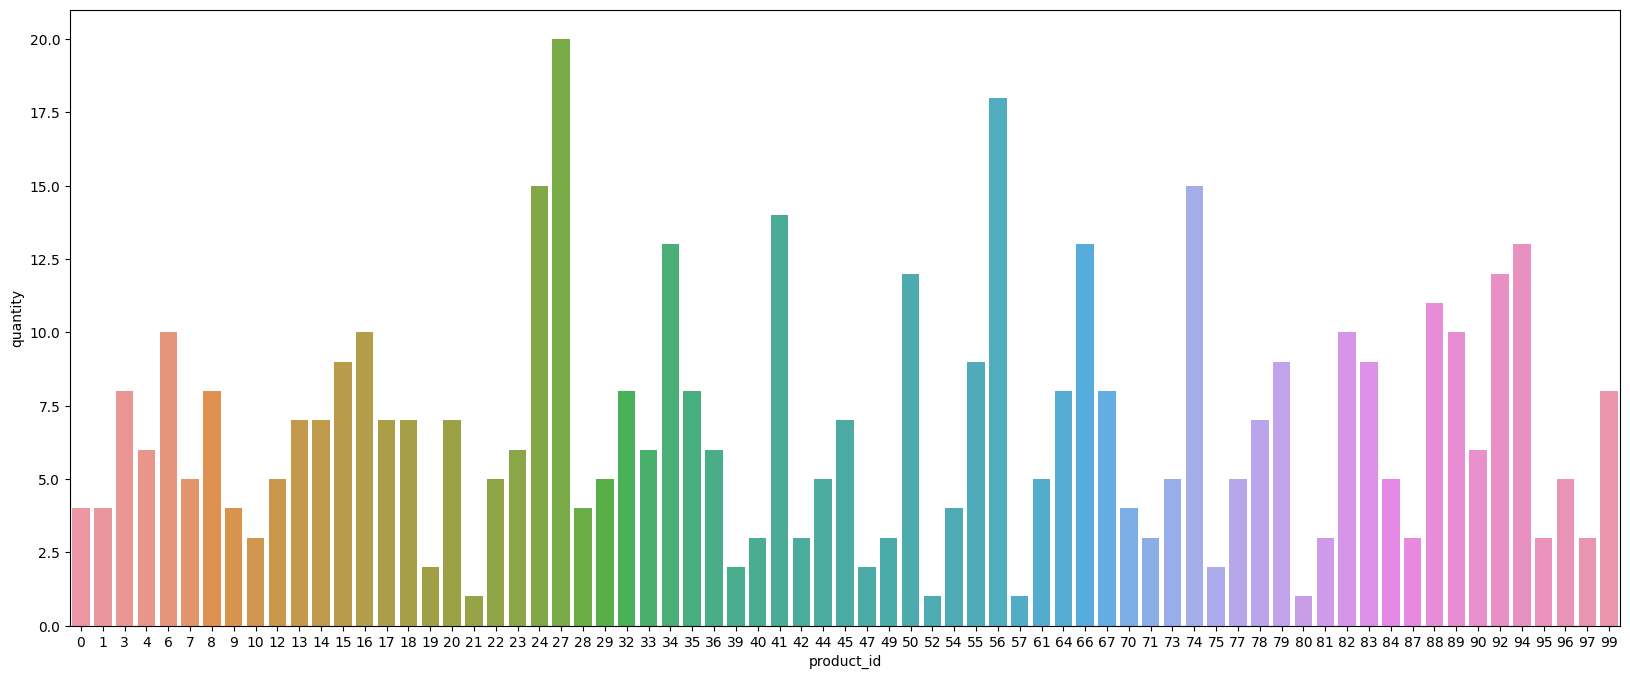

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(top_products, x='product_id', y='quantity')

In [ ]:
top_products.query('product_id == 56')

,product_id,quantity
42,56,18


In [ ]:
concat_dataset.head()

,product_id,quantity,name,date
0,82,4,Vasiliy_Ivanov,2020-12-09
1,74,2,Vasiliy_Ivanov,2020-12-09
2,54,3,Vasiliy_Ivanov,2020-12-09
3,79,3,Petr_Fedorov,2020-12-09
4,35,3,Anton_Petrov,2020-12-09


In [ ]:
top_products_per_day = concat_dataset.groupby('date', as_index=False).agg({'quantity': 'sum'})

In [ ]:
top_products_per_day

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


<Axes: xlabel='date', ylabel='quantity'>

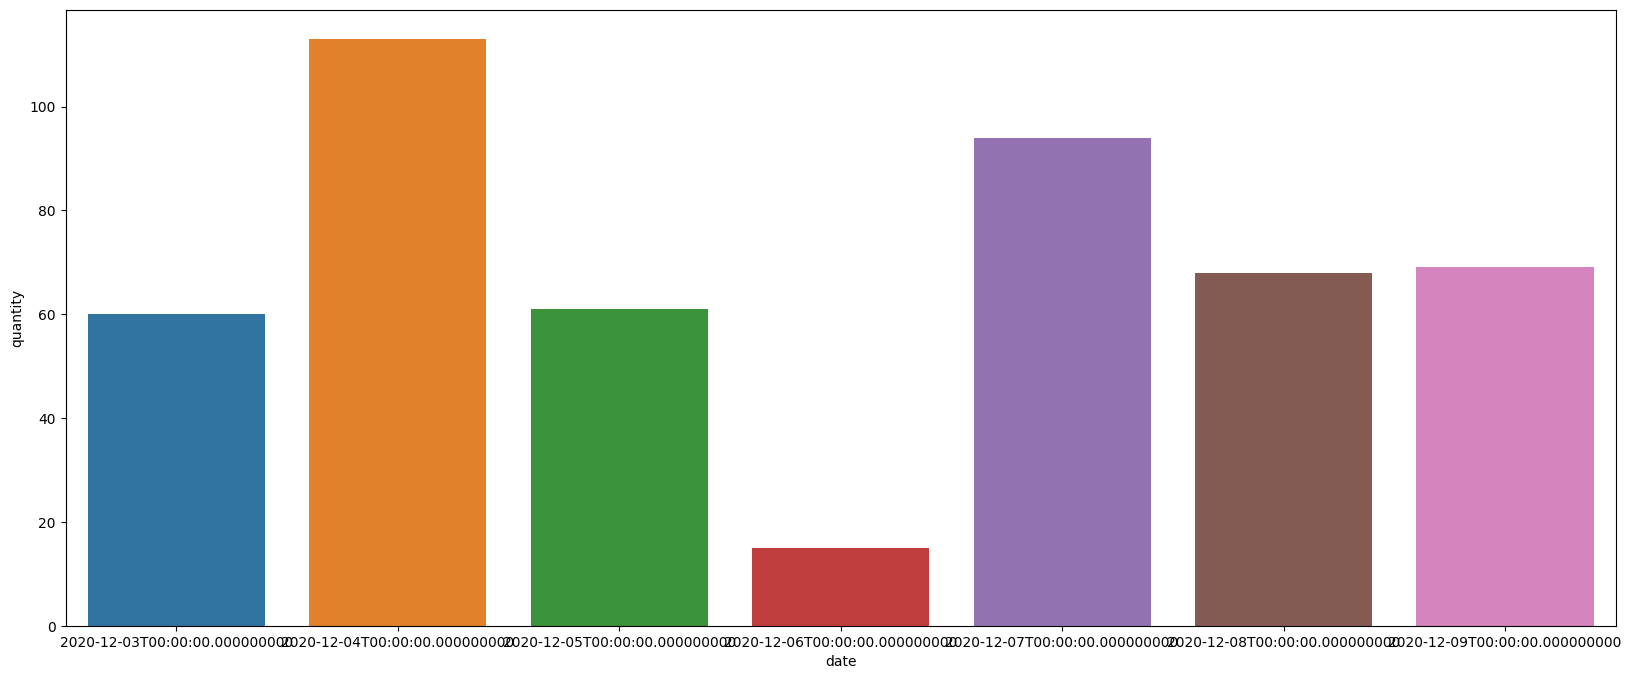

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(top_products_per_day, x='date', y='quantity')

In [ ]:
drop_dataset = concat_dataset.drop_duplicates(['name', 'product_id', 'date'])

In [ ]:
drop_dataset.groupby(['name', 'product_id']).agg({'date': 'count'}).query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


# Дополнительный проект

In [ ]:
with open('/content/drive/MyDrive/Karpov_Courses/data/4_necessary_inn.txt', 'r') as f:
    data = [el.strip() for el in f.readlines()]

In [ ]:
data = list(map(int, data))

In [ ]:
data

[394609645484,
 281578625230,
 923769811917,
 998694734508,
 271011690615,
 924952812367,
 646685244561,
 581531230312,
 841967395801,
 962179889311,
 873191383820,
 590538076039,
 194319975048,
 614658394086,
 571270160555,
 609400911893,
 595260069852,
 706966142477,
 173050718969,
 968048428696,
 806967744814,
 575198252501,
 283081417246,
 663119569897,
 600958529354,
 280452832937,
 415557497037,
 195142638722,
 472181033836,
 722903871682,
 442387408954,
 196518820495,
 653798670054,
 126259856639,
 175482780898,
 192518356612,
 817648134701,
 321724220657,
 864970037680,
 822991191528,
 205472219644,
 532801459453,
 657038381012,
 197916669463,
 849814898285,
 617082656257,
 500480544925,
 765833725639,
 263518962896,
 415856290529,
 812729265571,
 688172366656,
 837771137752,
 456294893364,
 668157292633,
 491435460276,
 323896131459,
 664667769879,
 293128896936,
 833493884251,
 120708914823,
 860475372268,
 172328288163,
 452188261986,
 818829342640,
 948029225406,
 310163740

In [ ]:
excel_df = pd.read_excel('/content/drive/MyDrive/Karpov_Courses/data/4_inn.xls', index_col='Unnamed: 0')

In [ ]:
excel_df = excel_df.drop(columns='#')

In [ ]:
excel_df

,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896
1,"РАО «Тимофеева, Алексеева и Кузнецова»",9342309660697,"г. Арзамас, наб. Фестивальная, д. 7 стр. 8/2, ...",Рожков Харлампий Алексеевич,Воспитатель,704229465069,8 (632) 620-8879,safonovantonin@rao.org,ooo.net,1990-05-16,2019-01-18,18393547520,19072454279,Tyoply Stan,"ст. Кяхта, бул. Нефтяников, д. 24, 768742",Формирование заказных методик,33876448811,47437574301
2,РАО «Юдин-Ефимова»,1277485323451,"п. Меренга, алл. Достоевского, д. 3/4 к. 497, ...",Филимон Фадеевич Дьячков,Автослесарь,267655036377,+74925330378,kdorofeev@npo.ru,ao.com,1982-11-04,1986-06-19,56104355836,18629292792,Danilov,"клх Усолье Сибирское, алл. Шишкина, д. 3/9 к. ...",Максимизация корпоративных метрик,94073834991,7701710065
3,Доронин Инкорпорэйтед,7139161431511,"д. Иваново, ул. Красных Партизан, д. 83 к. 4, ...",Крылов Глеб Якубович,Тюремный надзиратель,362024991175,+7 118 643 21 48,nkulakova@mail.ru,ooo.ru,2005-01-02,2004-04-06,10398489351,32502585383,Beryozovsky,"г. Заводоуковск, ул. Гражданская, д. 7 к. 8/5,...",Разработка ориентированных на пользователя инт...,86971505490,61148002572
4,Объединенная энергетическая компания,6114798049639,"к. Энгельс, наб. Шишкина, д. 120, 823828",Субботин Вячеслав Федотович,Инженер-электрик,257948948010,8 642 249 2134,evgraf_18@yahoo.com,gerasimova.biz,1983-07-02,1992-06-20,20074507047,40083207999,Bavly,"к. Соль-Илецк, пер. Пригородный, д. 804 к. 1/3...",Монетизация интуитивных веб-сервисов,36351136214,34861533393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,"ИП «Зайцев, Шубин и Дементьева»",6580539599719,"к. Чебаркуль, бул. Кольцевой, д. 19 к. 3, 911953",Назар Гордеевич Миронов,Дефектолог,575321775842,8 (390) 976-88-54,juvenali_66@ao.edu,aviakompanija.edu,2007-02-01,2014-10-29,13383530491,62100202894,Gudermes,"г. Миасс, пр. Пожарского, д. 39 стр. 880, 386211",Охват прозрачных методик,88659854892,61232741869
2106,Юдина Лтд,5012825137426,"д. Темрюк, ш. Автомобилистов, д. 9 стр. 59, 80...",Игнатов Кирилл Арсенович,Прозектор,703895742672,+7 854 489 5577,gavrila_2019@gmail.com,npo.net,1973-08-13,2001-11-09,40544984216,35386922447,Tver,"к. Мыс Шмидта, алл. Комарова, д. 257 стр. 3, 8...",Увеличение кроссплатформенных действий,20441750025,67450329265
2107,Антонова Лимитед,7659150538516,"г. Ноябрьск, пр. Весенний, д. 418, 214696",Александров Радим Ярославович,Дознаватель,576824176737,+7 (135) 034-6805,chernovlongin@rambler.ru,krilov.net,2018-11-03,2016-06-15,39266483828,21174514029,Sharypovo,"с. Щелково, алл. Попова, д. 143 к. 811, 155684",Мотивация сенсационных решений,9278989412,77350481806
2108,ООО «Хохлов Казаков»,9506828156265,"к. Липецк, наб. Халтурина, д. 60, 449290",Воробьев Сидор Фролович,Снайпер,157426408379,+7 172 548 4422,qpanova@hotmail.com,oao.org,1980-07-02,2009-11-23,76945273610,95601014531,Privolzhskiy,"п. Токма, ш. 50 лет Победы, д. 730, 791941",Охват серверных результатов,84921082372,85023560472


In [ ]:
excel_df.dtypes

name                      object
reg_number                 int64
address                   object
head                      object
head_job                  object
head_inn                   int64
phone                     object
email                     object
site                      object
registration_date         object
nalogoplatelschik_code    object
oktmo_code                 int64
okato_code                 int64
registration_region       object
okato_name                object
field                     object
capital,RUB                int64
income,RUB                 int64
dtype: object

In [ ]:
selected_inn = excel_df.query('head_inn == @data')

In [ ]:
selected_inn['income,RUB'].sum()

6104522627393

In [ ]:
selected_inn.to_csv('/content/drive/MyDrive/Karpov_Courses/data/selected_inn.to_csv', index=False)

In [ ]:
pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/selected_inn.to_csv')

,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
0,Пермэнергосбыт,6417532956774,"ст. Слюдянка, пер. Брянский, д. 378 стр. 634, ...",Емельян Феликсович Зайцев,Релайтер,175482780898,8 833 729 83 14,boleslav28@gmail.com,krilova.net,1986-03-20,1998-02-11,47158105405,10234283083,Novosilikatnyy,"г. Кропоткин (Краснод.), пр. Лесный, д. 8/3 к....",Разработка подробных результатов,44637351562,67534335517
1,ЗАО «Кабанова Ковалев»,9343329412518,"с. Нарткала, ул. Верхняя, д. 68 стр. 1, 393309",Геннадий Денисович Григорьев,Бондарь,120708914823,+7 455 632 1053,kapustinjulian@oao.com,ao.ru,2011-09-28,1983-11-10,20653722407,92544205998,Severodvinsk,"д. Москва, МГУ, бул. Транспортный, д. 75 стр. ...",Монетизация передовых действий,78570288945,19932336080
2,Неофарм,3813743111150,"г. Долинск, ш. Московское, д. 25 к. 5, 227970",Юрий Архипович Богданов,Полицейский,663119569897,+7 077 854 47 31,bazhen41@matveeva.net,ao.com,2019-01-30,1986-09-01,96067740308,47030638090,Kovylkino,"с. Сладково, наб. Вавилова, д. 62 к. 627, 198606",Эксплуатация круглосуточных пользователей,30634104861,3103853229
3,Арконик СМЗ,7465966885549,"п. Тобольск, ул. Лунная, д. 375 стр. 724, 119588",Аникей Артёмович Павлов,Оперативный работник,722903871682,8 120 448 48 45,emeljan_75@gmail.com,ao.com,2004-08-10,2012-04-01,79166677871,45647356291,Otradnyy,"клх Миасс, пер. Тургенева, д. 4/2 к. 8, 505443",Использование серверных диапазонов,85286893329,8607813826
4,Фармперспектива,6205521489390,"к. Горно-Алтайск, ул. Степана Разина, д. 646 с...",Шашков Алексей Богданович,Фортификатор,837771137752,88711723244,ustinovaoksana@gmail.com,npo.biz,1982-05-29,1981-10-10,13185275127,67033649508,Ishim,"клх Кунгур, ш. Запрудное, д. 13, 038583",Максимизация мультимедийных интерфейсов,88304638400,29181260019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,"ЗАО «Кабанова, Титов и Бирюкова»",4405157155853,"клх Щелково, наб. Некрасова, д. 518, 873237",Варлаам Елисеевич Емельянов,Инженер-конструктор,575198252501,+7 (038) 371-4551,valentin1979@oao.org,abb.net,2006-11-18,2016-02-29,78655694400,49188723218,Valday,"п. Курск, пер. Восьмого Марта, д. 7, 831314",Синхронизация круглосуточных пользователей,97034714796,9608612080
111,"ООО «Фомин, Симонова и Никифорова»",9213736030860,"к. Курск, ш. Баумана, д. 4 к. 3/4, 468572",Антип Антонович Смирнов,Радиолог,270813334693,+70989264802,nikandrzhukov@gmail.com,rao.com,1999-07-31,2009-02-27,51955852862,98399872283,Privolzhskiy,"п. Кашхатау, ш. Базарное, д. 66 стр. 5, 004721",Перезагрузка B2C действий,77532182557,7246816762
112,НПО «Зимин Иванов»,6791957421599,"п. Апрелевка, пер. Поселковый, д. 12 стр. 9, 9...",Муравьев Константин Игнатович,Географ,124852843647,8 160 092 8516,vadim05@ooo.biz,npo.edu,2001-11-16,2010-10-03,83247763843,43244910008,Gudermes,"п. Камышлов, ул. Фабричная, д. 2, 994773",Развитие популярных интернет-компаний,53149780410,48323910899
113,Юдина Лтд,5012825137426,"д. Темрюк, ш. Автомобилистов, д. 9 стр. 59, 80...",Игнатов Кирилл Арсенович,Прозектор,703895742672,+7 854 489 5577,gavrila_2019@gmail.com,npo.net,1973-08-13,2001-11-09,40544984216,35386922447,Tver,"к. Мыс Шмидта, алл. Комарова, д. 257 стр. 3, 8...",Увеличение кроссплатформенных действий,20441750025,67450329265
